State space time series modeling with statsmodels.

- Local Level + Seasonality Model

**References:**

- statsmodels documentations
    - https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_structural_harvey_jaeger.html
    - https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html
    - https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.structural.UnobservedComponentsResults.html
    
- Local Level + Seasonality Model
    - [松浦健太郎, Stan入門 ― 次世代のベイジアンモデリングツール in 岩波データサイエンス Vol.1、岩波書店(2015)](https://www.amazon.co.jp/dp/4000298518/ref=cm_sw_r_tw_dp_x_ZUU6FbWE32YDC)
    - [伊東宏樹、Ｒによる状態空間モデリング in 岩波データサイエンス Vol.6、岩波書店(2017)](https://www.amazon.co.jp/dp/4000298569/ref=cm_sw_r_tw_dp_x_WZU6FbBB04HB3)

In [1]:
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

# Local Level + Seasonality Model
$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \gamma_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + \eta^{(\mu)}_t, \quad \eta^{(\mu)}_t \sim N(0, \sigma_{\mu}^2)\\ 
\gamma_{t+1} &= - \gamma_t - \gamma_{t-1} - \gamma_{t-2} + \eta^{(\gamma)}_t,\quad \eta^{(\gamma)}_t \sim N(0, \sigma_\gamma^2)
\end{aligned}
$$

In [2]:
# https://github.com/iwanami-datascience/vol1/matsuura/example2/input/data-season.txt
df_seasonal_sales = pd.read_csv('../../data/data-season.txt')
df_seasonal_sales = df_seasonal_sales.rename(columns={'Y': 'sales'})

<AxesSubplot:>

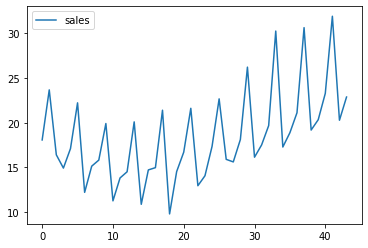

In [3]:
df_seasonal_sales.plot()

Optimization terminated successfully.
         Current function value: 1.741845
         Iterations: 11
         Function evaluations: 21
         Gradient evaluations: 21


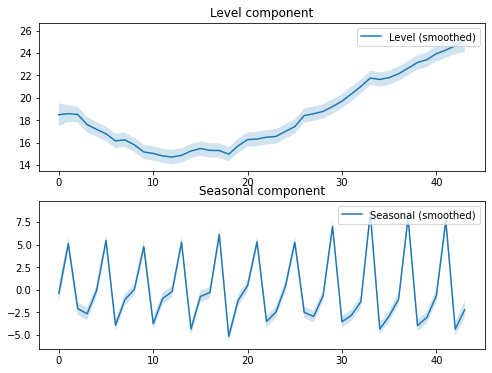

In [4]:
seasonal_model = sm.tsa.UnobservedComponents(df_seasonal_sales['sales'], level='local level', seasonal=4, use_exact_diffuse=True)
seasonal_results = seasonal_model.fit(method='bfgs')

fig = seasonal_results.plot_components(which='smoothed', seasonal=True, observed=False, figsize=(8, 6))